In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/DataSets

/content/drive/MyDrive/DataSets


In [ ]:
import tensorflow
from keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2,os
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



2.6.0


In [ ]:
!python --version

Python 3.7.11


In [ ]:

data_path='/content/drive/MyDrive/DataSets'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))
print(label_dict)
print(categories)
print(labels)

{'Maskless': 0, 'Mask': 1}
['Maskless', 'Mask']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
           
            data.append(resized)
            target.append(label_dict[category])
       
        except Exception as e:
            print('Exception:',e)

In [ ]:

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)

new_target=np_utils.to_categorical(target)

In [ ]:
new_target.shape


(60, 2)

In [ ]:
data.shape

(60, 100, 100, 3)

In [ ]:


model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 200)       5600      
_________________________________________________________________
activation_4 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_5 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 52900)            

In [ ]:

train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [ ]:
train_data.shape

(48, 100, 100, 3)

In [ ]:
train_target.shape

(48, 2)

In [ ]:
history=model.fit(train_data,train_target,epochs=100,validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 3s 837ms/step - loss: 0.3649 - accuracy: 0.9737 - val_loss: 1.0547 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 3s 692ms/step - loss: 0.3356 - accuracy: 0.9211 - val_loss: 0.9587 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 3s 691ms/step - loss: 0.2715 - accuracy: 0.8947 - val_loss: 1.0497 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 3s 682ms/step - loss: 0.2185 - accuracy: 0.8947 - val_loss: 1.1011 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 3s 681ms/step - loss: 0.1392 - accuracy: 0.9737 - val_loss: 1.3666 - val_accuracy: 0.4000
Epoch 6/100
2/2 [==============================] - 3s 681ms/step - loss: 0.1667 - accuracy: 0.9737 - val_loss: 1.3019 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 3s 682ms/step - loss: 0.1052 - accuracy: 1.0000 - val_loss: 1.4329 - val_accuracy: 0.5000
Epoch 8/100
2

In [ ]:
model.evaluate(test_data,test_target)


1/1 [==============================] - 0s 363ms/step - loss: 1.1157 - accuracy: 0.6667


[1.1157169342041016, 0.6666666865348816]

In [ ]:
model.save('model.h5')

In [ ]:
from keras.preprocessing import image

In [ ]:
model=load_model('model.h5')

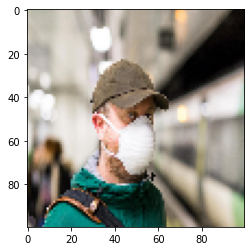

In [ ]:
i=image.load_img('Mask/1 (16).jpg',target_size=(100,100))
plt.imshow(i)

In [ ]:
i=image.img_to_array(i)/255.0
i=i.reshape(1,100,100,3)
p=model.predict(i)
print(p)

[[8.987732e-10 1.000000e+00]]


In [ ]:
print(p[0][0]<p[0][1])

True
